<a href="https://colab.research.google.com/github/Metaboll/Keras-FaceBook/blob/master/BOT_VIAJES_5_FOR_Logic_NLP_Creating_a_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOT VIAJES 5 + Train Sentence Generator + Deep Learning for NLP - Creating a chatbot

In [0]:
#https://towardsdatascience.com/deep-learning-for-nlp-creating-a-chatbot-with-keras-da5ca051e051
#
#
#
#CAMBIAMOS A LO GRANDE HACIENDO UN LOOP DE FRASES POR LO QUE SOLO VAMOS a ENTRENAR UNA FRASE 

#
#
#
#
# GENERO LAS SENTENCIAS LOS ENTRENAMIENTOS Y LOS TEST
# 26/8/2019 AHORA PONGO PREGUNTAS TRAMPAS PARA QUE CONTESTE IDONTKNOW
# 29/8/2019 PONGO NOMBRES QUE NO CONOCE EN PREGUNTA WHERE Y AUNMENTO LONG FRASES 
# 29/8/2019 ADEMAS HAGO PREGUNTAS WHEN
# 29/8/2019 TIPO DE TRANSPORTE
# 04/9/2019 dia
# 05/9/2019 dia. SOLO SE ANALIZA UNA ORACION. LA ORACION GRANDE SE DIVIDE EN PTOS
# 07/9/2019 SE PONE SPACY EN ESPAÑOL
# 09/9/2019. SE PONE O NO SUJETO Y SE METE PALABRAS DESCONOCIDAS COMO RUIDO.
# FORMATEAR FECHAS
# https://github.com/dateutil/dateutil
# https://parzibyte.me/blog/2018/12/19/obtener-formatear-fecha-hora-actual-python/
# https://stackoverflow.com/questions/19994396/best-way-to-identify-and-extract-dates-from-text-python



In [0]:
#Library Imports
import pickle
import numpy as np
import time

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import secrets                              # imports secure module.
import random

secure_random = secrets.SystemRandom()      # creates a secure random object.
def random_funct_generator(my_list, num_of_elements_to_select):
  my_result = []
  #list_of_random_items = secure_random.sample(group_of_items, num_to_select)
  list_of_random_items = secure_random.sample(my_list, num_of_elements_to_select)
  #first_random_item = list_of_random_items[0]
  #second_random_item = list_of_random_items[1]
  #print(first_random_item)
  #print(second_random_item)
  for n in range(num_of_elements_to_select):
    my_result.append(list_of_random_items[n])
  return my_result


In [0]:
#https://stackoverflow.com/questions/2475518/python-how-to-append-elements-to-a-list-randomly
from random import randrange, sample

def random_insert(lst, item):
    lst.insert(randrange(len(lst)+1), item)
    #return

array_of_noums = ["yo", "mary", "eduard", "darlyn","filip","ferdinand", "sebastian", "margaret", "john"]
random_insert(array_of_noums , "Jorge")
print(array_of_noums)

In [0]:
def trainer_function2():
  group_of_noums = ("yo", "mary", "eduard", "darlyn","filip","ferdinand", "sebastian", "margaret", "john") 
  group_of_verbs_places = ("quiero_ir", "viajar", "desplazarse", "viaje_negocios")
  group_of_places = ("venecia","barcelona", "san_francisco", "new_york",  "amsterdam","moscu","londres","el_cabo")
  
  #group_of_verbs_time = ("quiero_ir", "viajar_para", "seria", "la_intencion_es","la_mejor_temporada", "intentaria")
  #group_of_time = ("mes","año", "proxima_temporada", "primavera", "verano", "dias")
  
  group_of_verbs_medios = ("quiero_ir", "ir", "queremos_viajar", "viajarian", "viajaria", "queremos_ir" , "mediante", "desplazarnos","viajar", "viajamos", "la_intencion_es_viajar","viajar_mediante")
  group_of_medios = ("coche","alquiler_coche", "autobus", "avion", "tren", "barco","crucero","ferry","ave","alvia")
  
  group_of_noums_salida_date = ( "yo", "nosotros","ellos","la_salida")
  group_of_verbo_salida_date = ("quiero_ir", "saldriamos", "seria","partiriamos",
                                "ir", "queremos_viajar", "viajarian", "viajaria",
                                "queremos_ir" ,  "viajamos", "la_intencion_es_viajar","viajar",
                               "queremos_salir")
  
  group_of_noums_llegada_date = ( "yo", "nosotros","ellos","el_regreso")
  group_of_verbo_llegada_date = ("llegariamos","la_llegada_seria", "desearimos_llegar", "tenemos_que_llegar","tenemos_que_regresar")
  group_of_verbo_conditional_date = ("sobre", "para", "el", "antes_del", "no_mas_tarde")
  
  #group_of_persons


  my_random_question = random.randint(0,1)
  
  l1 = random_funct_generator(group_of_noums, 1)
  l2 = random_funct_generator(group_of_verbs_places, 1)
  l3 = random_funct_generator(group_of_places, 1)
  
  #l4 = random_funct_generator(group_of_verbs_time, 1)
  #l5 = random_funct_generator(group_of_time, 1)
  
  l6 = random_funct_generator(group_of_verbs_medios, 1)
  l7 = random_funct_generator(group_of_medios, 1)
  
  l8 = random_funct_generator(group_of_noums_salida_date, 1)
  l9 = random_funct_generator(group_of_verbo_salida_date, 1)
  
  l10 = random_funct_generator(group_of_noums_llegada_date, 1)
  l11 = random_funct_generator(group_of_verbo_llegada_date, 1)
  l12 = random_funct_generator(group_of_verbo_conditional_date, 1)
 
 
  
    
  #Donde/Como/Salida/llegada
  random_ = random.randint(0,3)
  #
  #   1 ORACIONES
  #
  ramdom_subjet  = random.randint(0,1) # sin sujeto o con sujeto
  if random_ == 0:
      random2 = random.randint(0,3)
      if random2 == 0: 
        #my_phrase = [l1[0]  , l2[0] ,  "a"  ,  l3[0],  ".", l6[0], "en", l7[0], ".", l8[0], l9[0], "el", "date",".", l10[0], l11[0], l12[0], "date2","."]
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l2[0] ,  "a"  ,  l3[0],  "."]
        else:
          my_phrase = [ l2[0] ,  "a"  ,  l3[0],  "."]
        my_question = ["donde" ,"?"] # ["Donde" ,  "quiere", l1[0]   ,"ir", "?"]
        my_response = l3[0]
        #print("1")
      elif random2 == 1:
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l6[0], "en", l7[0], "."]
        else:
          my_phrase = [ l6[0], "en", l7[0], "."]
        my_question = ["donde" ,"?"] # ["Donde" ,  "quiere", l1[0]   ,"ir", "?"]
        my_response = "no_se_donde"
        #print("2")
      elif random2 == 2:
        if ramdom_subjet == 0:
          my_phrase = [l8[0], l9[0], "el", "date","."]
        else:
          my_phrase = [l9[0], "el", "date","."]
        my_question = ["donde" ,"?"] # ["Donde" ,  "quiere", l1[0]   ,"ir", "?"]
        my_response = "no_se_donde"
        #print("3")
      else:
        if ramdom_subjet == 0:
          my_phrase = [ l11[0], l12[0], "date","."]
        else:
          my_phrase = [ l10[0], l11[0], l12[0], "date","."]
        
        my_question = ["donde" ,"?"] # ["Donde" ,  "quiere", l1[0]   ,"ir", "?"]
        my_response = "no_se_donde"
        #print("4")
      
  
      
  elif random_ == 1:
      random2 = random.randint(0,3)
      if random2 == 0:
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l6[0], "en", l7[0], "."]
        else:
          my_phrase = [ l6[0], "en", l7[0], "."]
        my_question = ["como" ,   "?"] #["Como" ,  "quiere", l1[0]   ,"viajar", "?"]
        my_response = l7[0]
        #print("5")
      elif random2 == 1:
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l2[0] ,  "a"  ,  l3[0],  "."]
        else:
          my_phrase = [ l2[0] ,  "a"  ,  l3[0],  "."]
        my_question = ["como" ,   "?"] #["Como" ,  "quiere", l1[0]   ,"viajar", "?"]
        my_response = "no_se_como"
        #print("6")
      elif random2 == 2:
        if ramdom_subjet == 0:
          my_phrase = [l8[0], l9[0], "el", "date","."]
        else:
          my_phrase = [l9[0], "el", "date","."]
        my_question = ["como" ,   "?"] #["Como" ,  "quiere", l1[0]   ,"viajar", "?"]
        my_response = "no_se_como"
        #print("7")
      else:
        if ramdom_subjet == 0:
          my_phrase = [ l11[0], l12[0], "date","."]
        else:
          my_phrase = [ l10[0], l11[0], l12[0], "date","."]
        my_question = ["como" ,   "?"] #["Como" ,  "quiere", l1[0]   ,"viajar", "?"]
        my_response = "no_se_como"
        #print("8")
        
  elif random_ == 2:
      random2 = random.randint(0,3)
      if random2 == 0:
        if ramdom_subjet == 0:
          my_phrase = [l8[0], l9[0], "el", "date","."]
        else:
          my_phrase = [l9[0], "el", "date","."]
        
        my_question = ["cuando" ,"salir", "?"] #["Cuando" ,  "quiere", l1[0]   ,"salir", "?"]
        my_response = "date"
        #print("9")
      elif random2 == 1:
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l2[0] ,  "a"  ,  l3[0],  "."]
        else:
          my_phrase = [ l2[0] ,  "a"  ,  l3[0],  "."]
        my_question = ["cuando" ,"salir", "?"] #["Cuando" ,  "quiere", l1[0]   ,"salir", "?"]
        my_response = "no_se_date" 
        #print("10")
      elif random2 == 2:
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l6[0], "en", l7[0], "."]
        else:
          my_phrase = [ l6[0], "en", l7[0], "."]
        my_question = ["cuando" ,"salir", "?"] #["Cuando" ,  "quiere", l1[0]   ,"salir", "?"]
        my_response = "no_se_date" 
        #print("11")
      else:
        if ramdom_subjet == 0:
          my_phrase = [ l11[0], l12[0], "date","."]
        else:
          my_phrase = [ l10[0], l11[0], l12[0], "date","."]
        my_question = ["cuando" ,"salir", "?"] #["Cuando" ,  "quiere", l1[0]   ,"salir", "?"]
        my_response = "no_se_date" 
        #print("12")
        
       
  else:
      random2 = random.randint(0,3)
      if random2 == 0:
        if ramdom_subjet == 0:
          my_phrase = [ l11[0], l12[0], "date2","."]
        else:
          my_phrase = [ l10[0], l11[0], l12[0], "date2","."]
        my_question = ["cuando"   ,"llegar", "?"] # ["Cuando" ,  "quiere", l1[0]   ,"llegar", "?"]
        my_response = "date2"
        #print("13")
      elif random2 == 1:
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l2[0] ,  "a"  ,  l3[0],  "."]
        else:
          my_phrase = [ l2[0] ,  "a"  ,  l3[0],  "."]
        my_question = ["cuando"   ,"llegar", "?"] # ["Cuando" ,  "quiere", l1[0]   ,"llegar", "?"]
        my_response = "no_se_date2"
        #print("14")
      elif random2 == 2:
        if ramdom_subjet == 0:
          my_phrase = [l1[0]  , l6[0], "en", l7[0], "."]
        else:
          my_phrase = [ l6[0], "en", l7[0], "."]
        
        my_question = ["cuando"   ,"llegar", "?"] # ["Cuando" ,  "quiere", l1[0]   ,"llegar", "?"]
        my_response = "no_se_date2"
        #print("15")
      else:
        if ramdom_subjet == 0:
          my_phrase = [l8[0], l9[0], "el", "date","."]
        else:
          my_phrase = [l9[0], "el", "date","."]
        my_question = ["cuando"   ,"llegar", "?"] # ["Cuando" ,  "quiere", l1[0]   ,"llegar", "?"]
        my_response = "no_se_date2"
        #print("16")
        
  
        
        
#my_response = "no_se_como"
#my_response = "no_se_donde"
#my_response = "no_se_date"  
#my_response = "no_se_date2" 


  
  return(my_phrase ,my_question,my_response)

#print(trainer_function())

def all_data_trainer_function2(number_of_elem):
  solution = []
  for n in range(number_of_elem):
    solution.append(trainer_function2())
  return solution
    
    
#print(all_data_trainer_function(2))
train_data = all_data_trainer_function2(10000)
print("1st phase.")
test_data = all_data_trainer_function2(1000)
print("2 nd phase.")

1st phase.
2 nd phase.


In [0]:
from google.colab import drive

#with open('intents.json') as json_data:
with open('drive/My Drive/data/data/train_qa.txt', 'rb') as f:
    #intents = json.load(json_data)
    train_data = pickle.load(f)
with open('drive/My Drive/data/data/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [0]:
#Number of training instances
len(train_data)

10000

In [0]:
#Number of test instances
len(test_data)

1000

In [0]:
#Example of one of the instances
#train_data[10]
print(train_data[17])

(['Sandra', 'moved', 'to', 'the', 'office', '.', 'John', 'went', 'back', 'to', 'the', 'garden', '.', 'Sandra', 'went', 'to', 'the', 'hallway', '.', 'Sandra', 'went', 'to', 'the', 'kitchen', '.', 'Mary', 'went', 'to', 'the', 'office', '.', 'Sandra', 'got', 'the', 'apple', 'there', '.'], ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'], 'yes')


In [0]:
' '.join(train_data[10][0])
n = 0
while True:
    my_s = ' '.join(train_data[n][0])
    my_s1 = ' '.join(train_data[n][1])
    my_s2 = ''.join(train_data[n][2])
    print(my_s,"/",my_s1,"/",my_s2)
    #print(my_s1)
    
    #print(my_s2)
    #time.sleep(.5)
    n+= 1
    if n == 100:
      break

Mary moved to the bathroom . Sandra journeyed to the bedroom . / Is Sandra in the hallway ? / no
Mary moved to the bathroom . Sandra journeyed to the bedroom . Mary went back to the bedroom . Daniel went back to the hallway . / Is Daniel in the bathroom ? / no
Mary moved to the bathroom . Sandra journeyed to the bedroom . Mary went back to the bedroom . Daniel went back to the hallway . Sandra went to the kitchen . Daniel went back to the bathroom . / Is Daniel in the office ? / no
Mary moved to the bathroom . Sandra journeyed to the bedroom . Mary went back to the bedroom . Daniel went back to the hallway . Sandra went to the kitchen . Daniel went back to the bathroom . Daniel picked up the football there . Daniel went to the bedroom . / Is Daniel in the bedroom ? / yes
Mary moved to the bathroom . Sandra journeyed to the bedroom . Mary went back to the bedroom . Daniel went back to the hallway . Sandra went to the kitchen . Daniel went back to the bathroom . Daniel picked up the foot

In [0]:
' '.join(train_data[10][1])

'Is Sandra in the office ?'

In [0]:
train_data[10][2]

'yes'

In [0]:
#First we need to create a vocabulary with our data
#For this we will use the training data only to - On the video it uses both
#train and test 
#Might have to use training and test later, as the dataset has very
#few words

In [0]:
#First we will build a set of all the words in the dataset:
vocab = set()
for story, question, answer in train_data:
    vocab = vocab.union(set(story)) #Set returns unique words in the sentence
                                    #Union returns the unique common elements from a two sets
    vocab = vocab.union(set(question))

In [0]:
vocab.add('no')
vocab.add('si')
vocab.add('no_ne')
vocab.add('cuando')
vocab.add('donde')
vocab.add('como')
vocab.add('viajar')
vocab.add('londres')
vocab.add('date')
vocab.add('date2')
vocab.add('no_se_date')
vocab.add('no_se_date2')
vocab.add('no_se_como')
vocab.add('no_se_donde')
vocab.add('linda')#----> un nombre con el que no ha sido entrenado..... a ver que pasa......

In [0]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'como',
 'cuando',
 'date',
 'date2',
 'discarded',
 'donde',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'linda',
 'londres',
 'milk',
 'moved',
 'no',
 'no_ne',
 'no_se_como',
 'no_se_date',
 'no_se_date2',
 'no_se_donde',
 'office',
 'picked',
 'put',
 'si',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'viajar',
 'went'}

In [0]:
#Calculate len and add 1 for Keras placeholder - Placeholders are used to feed in the data to the network. 
#They need a data type, and have optional shape arguements.
#They will be empty at first, and then the data will get fed into the placeholder
vocab_len = len(vocab) + 1

In [0]:
vocab_len

51

In [0]:
#Now we are going to calculate the longest story and the longest question
#We need this for the Keras pad sequences. 
#Keras training layers expect all of the input to have the same length, so 
#we need to pad 
all_data = test_data + train_data
all_story_lens = [len(data[0]) for data in all_data]
max_story_len = (max(all_story_lens))
max_question_len = max([len(data[1]) for data in all_data])

## Vectorizing the data

First, we will go through a manual process of how to vectorize the data, and then we will create a function that does this automatically for us. 

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
#Tokenize the stories, questions and answers:
train_story_text = []
train_question_text = []
train_answers = []
#Create an instance of the tokenizer object:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)
#Dictionary that maps every word in our vocab to an index
# It has been automatically lowercased
#This tokenizer can give different indexes for different words depending on when we run it
tokenizer.word_index

{'.': 9,
 '?': 11,
 'apple': 43,
 'back': 45,
 'bathroom': 33,
 'bedroom': 47,
 'como': 31,
 'cuando': 24,
 'daniel': 14,
 'date': 36,
 'date2': 23,
 'discarded': 37,
 'donde': 22,
 'down': 21,
 'dropped': 18,
 'football': 41,
 'garden': 50,
 'got': 40,
 'grabbed': 38,
 'hallway': 2,
 'in': 26,
 'is': 6,
 'john': 8,
 'journeyed': 42,
 'kitchen': 10,
 'left': 39,
 'linda': 13,
 'londres': 29,
 'mary': 4,
 'milk': 49,
 'moved': 34,
 'no': 44,
 'no_ne': 30,
 'no_se_como': 12,
 'no_se_date': 19,
 'no_se_date2': 1,
 'no_se_donde': 32,
 'office': 27,
 'picked': 16,
 'put': 25,
 'sandra': 7,
 'si': 5,
 'the': 3,
 'there': 35,
 'to': 46,
 'took': 15,
 'travelled': 17,
 'up': 20,
 'viajar': 28,
 'went': 48}

In [0]:
#Separating each of the elements
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question) 
    train_answers.append(answer)
    
#Coverting the text into the indexes 
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [0]:
#Create a function for vectorizing the stories, questions and answers:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []
    new_word = "no_ne"
    for story, question, answer in data:
        #Getting indexes for each word in the story
        #x = [word_index[word.lower()] for word in story]
        x = []
        for word in story:
          
          if word.lower() in word_index:
            #print(word_index[word.lower()])
            x.append(word_index[word.lower()])
          else:
            print("problema con nueva palabra", word.lower() )
            #print(word_index[new_word.lower()])
            x.append(word_index[new_word.lower()])
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))
        

In [0]:

print(max_story_len)
my_text = ' la_salida viajaria el date .'
my_story = ' ellos ira en coche a londres .'
my_story2 = ' ellos ir en coche a londres .'
my_question = ' cuando llegar  ?'

my_data = [(my_story.split(), my_question.split(),'no')]
my_data2 = [(my_story2.split(), my_question.split(),'no')]
#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)
print(my_story)
print("*"*30)
my_story2, my_ques, my_ans = vectorize_stories(my_data2)

print(my_story2)

156
problema con nueva palabra ellos
problema con nueva palabra ira
problema con nueva palabra en
problema con nueva palabra coche
problema con nueva palabra a


KeyError: ignored

In [0]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)
inputs_test, questions_test, answers_test = vectorize_stories(test_data)
print("----------------------------------------------------------")
inputs_train[0]
print("----------------------------------------------------------")
train_story_text[0]
print("----------------------------------------------------------")
train_story_seq[0]

KeyError: ignored

## Building the Network

In [0]:
#Imports
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [0]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions
input_sequence = Input((max_story_len,)) #As we dont know batch size yet
question = Input((max_question_len,))

In [0]:
#Create input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Create input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [0]:
#Create question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [0]:
#Now lets encode the sequences, passing the placeholders into our encoders:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [0]:
#For the response we want to add this match with the ouput of input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input

In [0]:
#Once we have the response we can concatenate it with the question encoded:
answer = concatenate([response, question_encoded])

In [0]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 3, 69) dtype=float32>

In [0]:
# Reduce the answer tensor with a RNN (LSTM)
answer = LSTM(32)(answer)

In [0]:
#Regularization with dropout:
answer = Dropout(0.5)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [0]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

In [0]:
#Now we build the final model:
model = Model([input_sequence,question], answer)

In [0]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             5056        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 3, 64)        5056        input_2[0][0]                    
____________________________________________________________________________________________

## Training and testing the model

In [0]:
history = model.fit([inputs_train,questions_train],answers_train, batch_size = 32, epochs =450, validation_data = ([inputs_test,questions_test],answers_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10000 samples, validate on 1000 samples
Epoch 1/450
10000/10000 [==============================] - 3s 334us/step - loss: 2.1150 - acc: 0.4737 - val_loss: 1.0978 - val_acc: 0.7410
Epoch 2/450
10000/10000 [==============================] - 2s 189us/step - loss: 0.9884 - acc: 0.7433 - val_loss: 0.7465 - val_acc: 0.7410
Epoch 3/450
10000/10000 [==============================] - 2s 185us/step - loss: 0.7230 - acc: 0.7542 - val_loss: 0.5650 - val_acc: 0.7440
Epoch 4/450
10000/10000 [==============================] - 2s 186us/step - loss: 0.5672 - acc: 0.7968 - val_loss: 0.4168 - val_acc: 0.8800
Epoch 5/450
10000/10000 [==============================] - 2s 188us/step - loss: 0.4518 - acc: 0.8500 - val_loss: 0.3404 - val_acc: 0.8800
Epoch 6/450
10000/10000 [==============================] - 2s 187us/step - loss: 0.3951 - acc: 0.8680 - val_loss: 0.3182 - val_acc: 0.8840
Epoch 7/450
10000/10000

In [0]:
filename = 'Z_chatbot_100_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


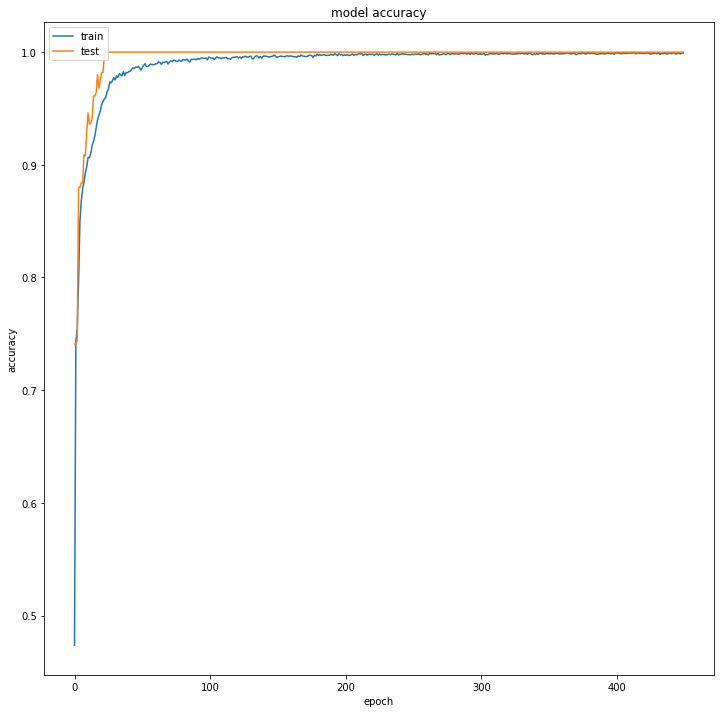

In [0]:
#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#To load a model that we have already trained and saved:
model.load_weights('Z_chatbot_100_epochs.h5')

In [0]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
pred_results = model.predict(([inputs_test,questions_test]))

In [0]:
#First test data point
test_data[9]

(['desplazarse', 'a', 'san_francisco', '.'],
 ['cuando', 'llegar', '?'],
 'no_se_date2')

In [0]:
#These are the probabilities for the vocab words using the 1st sentence
pred_results[9]

array([4.9493665e-28, 4.7964866e-28, 6.7298355e-24, 4.8150762e-28,
       5.1006748e-28, 1.0000000e+00, 5.9842700e-24, 4.9555632e-28,
       4.9356033e-28, 5.0110713e-28, 5.0364445e-28, 4.9876713e-28,
       5.0027436e-28, 4.3618030e-22, 1.1152727e-18, 5.1321175e-28,
       4.8951020e-28, 2.3093934e-26, 5.0585489e-28, 4.9845710e-28,
       4.9866250e-28, 1.0581593e-21, 4.8265331e-28, 4.9060196e-28,
       5.0412117e-28, 9.3894097e-22, 3.0914984e-20, 2.1138338e-18,
       4.9020907e-28, 4.9946778e-28, 1.7797318e-21, 5.0088734e-28,
       5.0512597e-28, 4.9475166e-28, 1.7004157e-22, 4.9317259e-28,
       4.9505938e-28, 4.8948781e-28, 4.9284162e-28, 5.0426927e-28,
       4.8427995e-28, 4.9275515e-28, 4.8594915e-28, 4.9775024e-28,
       4.7551316e-28, 1.2631157e-23, 7.7722514e-23, 5.0443663e-28,
       4.8358950e-28, 4.9967169e-28, 4.8999033e-28, 5.1092432e-28,
       1.3209066e-19, 2.2650955e-20, 4.9318391e-28, 5.0214430e-28,
       4.7180007e-28, 5.1669850e-28, 2.6712340e-22, 5.0983208e

In [0]:
val_max = np.argmax(pred_results[10])
print(val_max)

53


In [0]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

NameError: ignored

In [0]:
#See probability:
pred_results[10][val_max]

1.0

In [0]:
#Now, we can make our own questions using the vocabulary we have
vocab

{'.',
 '?',
 'a',
 'alquiler_coche',
 'alvia',
 'amsterdam',
 'antes_del',
 'autobus',
 'ave',
 'avion',
 'barcelona',
 'barco',
 'coche',
 'como',
 'crucero',
 'cuando',
 'darlyn',
 'date',
 'date2',
 'desearimos_llegar',
 'desplazarse',
 'desplzarnos',
 'donde',
 'eduard',
 'el',
 'el_cabo',
 'el_regreso',
 'el_viajaria',
 'ellos',
 'ellos_viajarian',
 'en',
 'ferdinand',
 'ferry',
 'filip',
 'ir',
 'john',
 'la_intencion_es_viajar',
 'la_llegada_seria',
 'la_salida',
 'linda',
 'llegar',
 'llegariamos',
 'londres',
 'margaret',
 'mary',
 'mediante',
 'moscu',
 'new_york',
 'no',
 'no_mas_tarde',
 'no_se_como',
 'no_se_date',
 'no_se_date2',
 'no_se_donde',
 'nosotros',
 'para',
 'partiriamos',
 'queremos_ir',
 'queremos_salir',
 'queremos_viajar',
 'quiero_ir',
 'saldriamos',
 'salir',
 'san_francisco',
 'sebastian',
 'seria',
 'si',
 'sobre',
 'tenemos_que_llegar',
 'tenemos_que_regresar',
 'tren',
 'venecia',
 'viajamos',
 'viajar',
 'viajar_mediante',
 'viajaria',
 'viajarian',
 

In [0]:

#ellos tenemos_que_llegar para date2 . / como ? / no_se_como
#yo llegariamos el date2 . / cuando llegar ? / date2
#ellos queriamos el date . / como ? / no_se_como
#ir en coche . / donde ? / no_se_donde
#john desplazarse a san_francisco . / cuando salir ? / no_se_date
#yo llegariamos el date2 . / como ? / no_se_como
#ferdinand quiero_ir a el_cabo . / cuando salir ? / no_se_date
#ellos seria el date . / cuando llegar ? / no_se_date2
#ferdinand quiero_ir a londres . / como ? / no_se_como
#yo saldriamos el date . / como ? / no_se_como
#yo tenemos_que_llegar no_mas_tarde date2 . / como ? / no_se_como
#yo viaje_negocios a amsterdam . / como ? / no_se_como
#filip desplazarse a el_cabo . / cuando salir ? / no_se_date
#yo queriamos el date . / como ? / no_se_como
#viajar_mediante en barco . / cuando llegar ? / no_se_date2
#nosotros saldriamos el date . / cuando salir ? / date
#viajar en alquiler_coche . / cuando salir ? / no_se_date
#mary viaje_negocios a el_cabo . / cuando salir ? / no_se_date
#nosotros tenemos_que_llegar sobre date2 . / cuando salir ? / no_se_date
#my_story = ' ferdinand viajar a venecia . ellos queremos_viajar el date . yo tenemos_que_llegar el date2 . ' 
#my_story = ' ellos tenemos_que_llegar para date2 . ' 
my_story = ' nosotros queriamos ir  en  coche basura.'
my_question = ' como  ?' 
#cuando salir ?
#cuando llegar ?
#my_question = ' Como ?'
#my_question = "Como quiere mary viajar ? "
#my_question = "Cuando quiere mary llegar ? "
#my_question = ' Como quiere i viajar ?'
#where is Anne ? / kitchen
#my_question.split()
#Put the data in the same format as before
my_data = [(my_story.split(), my_question.split(),'no')]
#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)
#Make the prediction
pred_results = model.predict(([my_story,my_ques]))
val_max = np.argmax(pred_results[0])
#print("La matriz de resultado; " ,pred_results[0])
print("Val max es; " ,val_max )
#Correct prediction!
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)
#Confidence
pred_results[0][val_max]

problema con nueva palabra queriamos
problema con nueva palabra basura.
Val max es;  17
coche


1.0

In [0]:
# A T E N C I O N

# entrena PARA FRASES COMPUESTAS


#my_story = ' ir en coche a londres .'
# donde ? ----->  RESPUESTA = londres
# como ? ----->  RESPUESTA = no_se_como


In [0]:
#https://nlpforhackers.io/complete-guide-to-spacy/
!pip install -U spacy==2.0.18

!python -m spacy download en_core_web_sm

  Using cached https://files.pythonhosted.org/packages/ae/6e/a89da6b5c83f8811e46e3a9270c1aed90e9b9ee6c60faf52b7239e5d3d69/spacy-2.0.18-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/a7/46640a46fd707aeb204aa4257a70974b6a22a0204ba703164d803215776f/thinc-6.12.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: es-core-news-sm 2.1.0 has requirement spacy>=2.1.0, but you'll have spacy 2.0.18 which is incompatible.
ERROR: en-core-web-sm 2.1.0 has requirement spacy>=2.1.0, but you'll have spacy 2.0.18 which is incompatible.
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.8
    Uninstalling spacy-2.1.8:
      Successfully uninstalled spacy-2.1.8


     |████████████████████████████████| 37.4MB 47.0MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.0.0-cp36-none-any.whl size=37405977 sha256=236f3f7713d0bf0bd0e6bfaedf969a91602cbd3d4afd79506ebf6262e92f5fb4
  Stored in directory: /tmp/pip-ephem-wheel-cache-81hh12hg/wheels/54/7c/d8/f86364af8fbba7258e14adae115f18dd2c91552406edc3fdaa
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.1.0
    Uninstalling en-core-web-sm-2.1.0:
      Successfully uninstalled en-core-web-sm-2.1.0

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [0]:
#doc = nlp("These are apples. These are oranges.")
doc = nlp('ellos tenemos_que_llegar para date .  el_viajaria en avion . yo partiriamos el date .')
#ellos tenemos_que_llegar para date2 . viajar_mediante en crucero . yo partiriamos el date .

doc = nlp('el_regreso desearimos_llegar para date . la_salida viajaria el date . el_viajaria en tren . yo partiriamos el date . yo desplazarse a el_cabo . ')
#margaret viajar a barcelona . / cuando salir ? / no_se_date

#el_regreso desearimos_llegar para date .
#sebastian desplazarse a barcelona .
#la_salida viajaria el date .
#yo desplazarse a el_cabo . 
#la_salida seria el date . 

my_questions =[' cuando llegar  ?','cuando salir ?','donde ?', ' Como ?']

#my_question = ' cuando llegar  ?'
#cuando salir ?
#cuando llegar ?
#my_question = ' Como ?'
n = 0
for sent in doc.sents:
    #print(type(sent))
    print("*"*20)
    my_story = sent.text
    print(my_story)
    print(n)
    n +=1
    print("*"*20)
    my_array_story = my_story.split()
    print(my_array_story)
    for my_question in my_questions:
      print(my_question.split())
      
      my_data = [(my_array_story , my_question.split(),'no')]
      #Vectorize this data
      my_story, my_ques, my_ans = vectorize_stories(my_data)
      #Make the prediction
      pred_results = model.predict(([my_story,my_ques]))
      val_max = np.argmax(pred_results[0])
      #print("La matriz de resultado; " ,pred_results[0])
      #print("Val max es; " ,val_max )
      #Correct prediction!
      for key,val in tokenizer.word_index.items():
        if val == val_max:
          k = key
      print("Respuesta------->   ",k)
      #pred_results[0][val_max]
      

********************
el_regreso desearimos_llegar para date .
0
********************
['el_regreso', 'desearimos_llegar', 'para', 'date', '.']
['cuando', 'llegar', '?']


NameError: ignored

In [0]:
target = nlp("Cats are beautiful animals.")
 
doc1 = nlp("Dogs are awesome.")
doc2 = nlp("Some gorgeous creatures are felines.")
doc3 = nlp("Dolphins are swimming mammals.")
 
print(target.similarity(doc1))  # 0.8901765218466683
print(target.similarity(doc2))  # 0.9115828449161616
print(target.similarity(doc3))  # 0.7822956752876101

In [0]:
import spacy
from nltk import Tree
#https://stackoverflow.com/questions/28618400/how-to-identify-the-subject-of-a-sentence



#nlp = spacy.load("en_core_web_sm")

doc = nlp("The fox and the cow jumps over the lazy dog.")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

        jumps                  
  ________|____________         
 |       fox          over     
 |    ____|____        |        
 |   |    |   cow     dog      
 |   |    |    |    ___|____    
 .  The  and  the the      lazy



[None]

In [0]:

# M O D E L O S       D E      L E N G U A J E      S P A C Y

#https://spacy.io/models/en


#     I N G L E S


!pip install -U spacy==2.0.18
!python -m spacy download en_core_web_sm
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("The fox and the cow jumps over the lazy dog.")



def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

#     E S P A Ñ O L

#!pip install -U spacy
#!python -m spacy download es

#!python -m spacy download es_core_news_sm
#import es_core_news_sm
#nlp = spacy.load("es_core_news_sm")

#nlp = es_core_news_sm.load()


Requirement already up-to-date: spacy==2.0.18 in /usr/local/lib/python3.6/dist-packages (2.0.18)

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')

        jumps                  
  ________|____________         
 |       fox          over     
 |    ____|____        |        
 |   |    |   cow     dog      
 |   |    |    |    ___|____    
 .  The  and  the the      lazy



[None]

In [0]:
# M O D E L O S       D E      L E N G U A J E      S P A C Y

#https://spacy.io/models/en



#!pip install -U spacy==2.0.18

#!python -m spacy download en_core_web_sm
#import spacy

#nlp = spacy.load("en_core_web_sm")
#doc = nlp("The fox and the cow jumps over the lazy dog.")



#def to_nltk_tree(node):
#    if node.n_lefts + node.n_rights > 0:
#        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
#    else:
#        return node.orth_


#[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]


#*****************************************************************

#     E S P A Ñ O L

#!pip install -U spacy
!python -m spacy download es

print(" ")
print("*"*30)
print(" ")

!python -m spacy download es_core_news_sm

import spacy
#import es_core_news_sm

print(" ")
print("HOLA ")
print(" ")
print("*"*30)
print(" ")

nlp = spacy.load("es_core_news_sm")
doc = nlp("El coche corre desde abril del año pasado")
for token in doc:
    print(token.text, token.pos_, token.dep_)
#nlp = es_core_news_sm.load()



    Linking successful
    /usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/es

    You can now load the model via spacy.load('es')

 
******************************
 

    Linking successful
    /usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/es_core_news_sm

    You can now load the model via spacy.load('es_core_news_sm')

 
HOLA 
 
******************************
 
El DET det
coche NOUN nsubj
corre VERB ROOT
desde ADP case
abril NOUN obl
del ADP case
año NOUN compound
pasado ADJ amod


In [0]:

doc = nlp("nosotros queremos salir en Mayo a Venecia")
#Google esta en San Francisco
#"Apple is looking at buying U.K. on April 1st, 2018"
# filtrar fechas en Python
#https://stackoverflow.com/questions/19994396/best-way-to-identify-and-extract-dates-from-text-python

for token in doc:
    print(token.text, token.pos_, token.dep_)

print(" ")
print("*"*30)
print(" ")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

print(" ")
print("*"*30)
print(" ")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

nosotros PRON nsubj
queremos VERB ROOT
salir VERB xcomp
en ADP case
Mayo NOUN obl
a ADP case
Venecia PROPN obl
 
******************************
 
Mayo 27 31 LOC
Venecia 34 41 LOC
 
******************************
 
         queremos              
    ________|_______            
   |              salir        
   |         _______|______     
   |       Mayo         Venecia
   |        |              |    
nosotros    en             a   



[None]

In [0]:
# ESTE CODIGO ESTA EN :
#SpaCy + Deep Learning for NLP- Creating a chatbot.ipynb

def sentence_to_semi_sintax2(doc, doc2,doc3):  
  #Y = []
  iter_nsubj = 1
  iter_pobj = 1
  iter_dobj = 1
  iter_attr = 1
  dic_ele = {}
  dic_inv_ele = {}

  new_phase =""
  new_phase2 =""
  
  last_last_token_type =""
  last_token_type =""
  last_token = ""
  for token in doc:
      #print(token.text, token.lemma_, token.pos_,  token.dep_ )
      procesado = token.text
      #if dic_inv_ele[token.text]:
      if not token.text in dic_inv_ele:
          #print("no existe ",token.text)
      
        if token.dep_ == "nsubj":
          nsub = "nsub"+str(iter_nsubj)
          dic_ele[nsub]=token.text
          #print(token.text)
          dic_inv_ele[token.text]=nsub
          iter_nsubj +=1
          procesado = nsub
        elif token.dep_ == "dobj":
          dobj = "dobj"+str(iter_dobj)
          iter_dobj +=1
          dic_ele[dobj]=token.text
          dic_inv_ele[token.text]=dobj
          procesado = dobj
        elif token.dep_ == "pobj":
          pobj = "pobj"+str(iter_dobj)
          iter_dobj +=1
          dic_inv_ele[token.text]=pobj
          procesado = pobj
        elif token.dep_ == "attr":
          attr = "attr"+str(iter_attr)
          iter_attr +=1
          dic_ele[attr]=token.text
          dic_inv_ele[token.text]=attr
          procesado = attr
        elif last_token == "and":
          if last_last_token_type == "nsubj":
            nsub = "nsub"+str(iter_nsubj)
            iter_nsubj +=1
            dic_ele[nsub]=token.text
            dic_inv_ele[token.text]=nsub
            procesado = nsub
      else: # ya existte esa palabra
        procesado = dic_inv_ele[token.text]
        #print("existe ",token.text)
      #new_phase = new_phase.join(token.text)
      new_phase = new_phase + procesado + " "
      last_last_token_type = last_token_type
      last_token_type = token.dep_
      last_token = token.text
 

  last_last_token_type =""
  last_token_type =""
  last_token = ""
  
  for token2 in doc2:
      #print(token.text, token.lemma_, token.pos_,  token.dep_ )
      procesado2 = token2.text
      
      #if dic_inv_ele[token.text]:
      if not token2.text in dic_inv_ele:
          #print("no existe ",token2.text)
      
        if token2.dep_ == "nsubj":
          nsub = "nsub"+str(iter_nsubj)
          dic_ele[nsub]=token2.text
          dic_inv_ele[token2.text]=nsub
          iter_nsubj +=1
          procesado2 = nsub
        elif token2.dep_ == "dobj":
          dobj = "dobj"+str(iter_dobj)
          iter_dobj +=1
          dic_ele[dobj]=token2.text
          dic_inv_ele[token2.text]=dobj
          procesado2 = dobj
        elif token2.dep_ == "pobj":
          pobj = "pobj"+str(iter_dobj)
          iter_dobj +=1
          dic_inv_ele[token2.text]=pobj
          procesado2 = pobj
        elif token2.dep_ == "attr":
          attr = "attr"+str(iter_attr)
          iter_attr +=1
          dic_ele[attr]=token2.text
          dic_inv_ele[token2.text]=attr
          procesado2 = attr
        elif last_token == "and":
          if last_last_token_type == "nsubj":
            nsub = "nsub"+str(iter_nsubj)
            iter_nsubj +=1
            dic_ele[nsub]=token2.text
            dic_inv_ele[token2.text]=nsub
            procesado2 = nsub
      else: # ya existte esa palabra
        procesado2 = dic_inv_ele[token2.text]
        #print("existe ",token2.text)
      #new_phase = new_phase.join(token2.text)
      new_phase2 = new_phase2 + procesado2 + " "
      last_last_token_type = last_token_type
      last_token_type = token2.dep_
      last_token = token2.text
      
  for token3 in doc3:
      procesado3 = token3.text
      
      if not token3.text in dic_inv_ele:
          #print("no existe ",token2.text)
        procesado3 = token3.text
        
      else: # ya existte esa palabra
        procesado3 = dic_inv_ele[token3.text]
        
  return(new_phase , new_phase2, procesado3 )


doc = nlp(u'He and she buy a car. Mary is in the kitchen')
doc_ = nlp(u'Where is Mary ?')
doc3 = nlp(u'car')
doc_ = nlp(u'He and she buy a car. Mary is in the kitchen ?')
doc2 = nlp(u'Mary moved to the bathroom . Sandra journeyed to the bathroom . Mary went back to the bedroom . Daniel went back to the hallway . / Is Daniel in the bathroom ? / no')
print(sentence_to_semi_sintax2(doc, doc_, doc3))

In [0]:
# parsin DATE in python

# https://stackoverflow.com/questions/19994396/best-way-to-identify-and-extract-dates-from-text-python




# Finding a verb with a subject from below — good

import spacy
from spacy.symbols import nsubj, VERB

nlp = spacy.load("en_core_web_sm")
#doc = nlp(u"Autonomous cars shift insurance liability toward manufacturers")
doc = nlp(u"Mary runs and walks sometimes")

# Finding a verb with a subject from below — good
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)